## Figures for Precambrian Research Submission - OFP
## **Authigenic Carbonate Nodules of the GSM**
- lots of code from original *Stratigraphy.ipynb* but with lots of better code and remade figures
  
Connor S. van Wieren, 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
import matplotlib.transforms as transforms
from matplotlib import colors
import matplotlib
import pandas as pd
import seaborn as sns
from VanStrat.VanStrat_simple import *
import string
from scipy.ndimage import rotate
from matplotlib.ticker import FuncFormatter
import matplotlib.gridspec as gridspec
import pickle
import dill
%matplotlib inline

plt.rcParams['figure.figsize'] = (5.5, 3.5)
%config InlineBackend.figure_format='retina'

sns.set_style('ticks',{'axes.edgecolor':'.3',
                       'xtick.color':'.3',
                       'ytick.color':'.3',
                       'text.color': '.3',
                       'axes.labelcolor':'.3',
                       'axes.grid': False,
                       'grid.linestyle': u'-.'})

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Avenir'

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)

fig_dir = '/Users/cvanwieren/Library/CloudStorage/Dropbox/GitHub/Publications/OFP_PC/img/'

# load data
home = '/Users/cvanwieren/Library/CloudStorage/Dropbox/GitHub/vanWieren_OFP_PrecRes/data/'
nods = pd.read_excel(home+'./hand_samples/nodules.xlsx') # GSM Authigenic Nodules

# load pickle
filename = './pickles/ofp_data.pkl'
dill.load_session(filename)

In [2]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', edgecolor='k',**kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = patches.Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, edgecolor=edgecolor,**kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [3]:
nods.columns

Index(['sample_name', 'sample_height', 'sample_facies', 'sample_features',
       'section', 'longax_dist_from_right_cm', 'shortax_dist_from_top_cm',
       'd13c_carb', 'd18o_carb', 'index', 'sample_facies_simplified'],
      dtype='object')

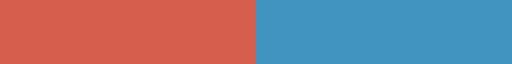

In [4]:
map = sns.color_palette('RdBu',n_colors=4).as_hex()
cmap = colors.ListedColormap([map[0],map[-1]])
cmap

In [5]:
map

['#d6604d', '#fddbc7', '#d1e5f0', '#4393c3']

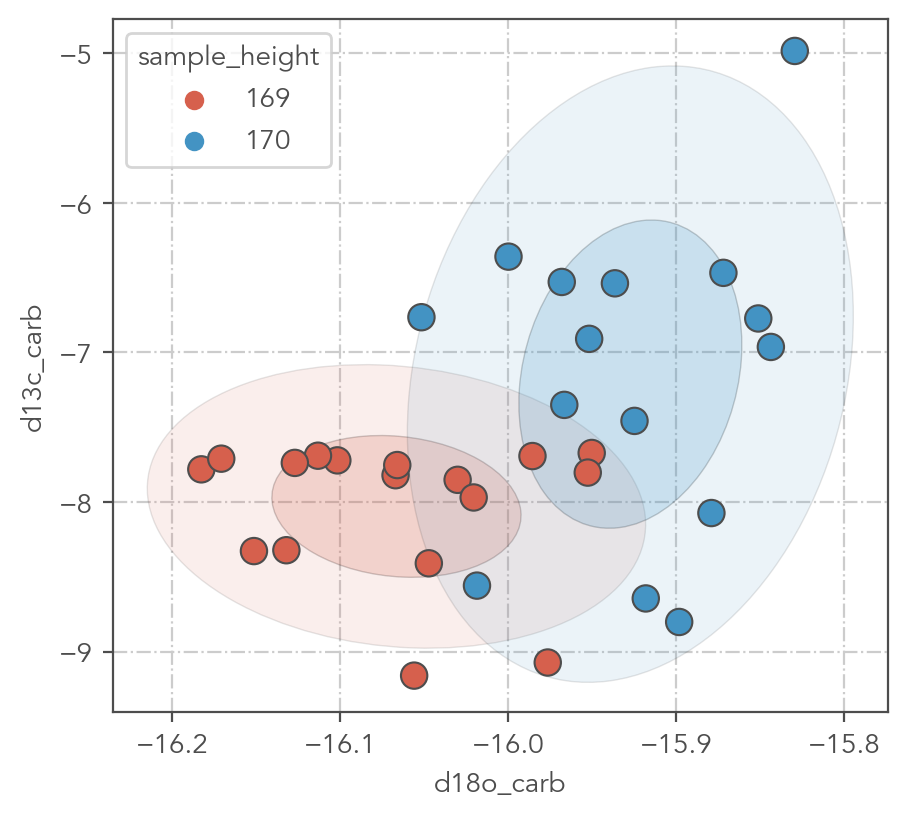

In [6]:
fig,ax = plt.subplots(1,1,figsize=(5,4.5))
ax.grid()
sns.scatterplot(x=nods['d18o_carb'],y=nods['d13c_carb'],hue=nods['sample_height'],palette=cmap,s=90,edgecolor='.3',zorder=10)
# plot confidence ellipses
n169 = nods[nods['sample_height']==169]
n170 = nods[nods['sample_height']==170]

for i,j in zip([n169,n170],[map[0],map[-1]]):
    confidence_ellipse(x=i['d18o_carb'],y=i['d13c_carb'],ax=ax,n_std=1,alpha=.2,lw=0.5,zorder=2,facecolor=j,label='1$\sigma$')
    confidence_ellipse(x=i['d18o_carb'],y=i['d13c_carb'],ax=ax,n_std=2,alpha=.1,lw=0.5,zorder=2,facecolor=j,label='1$\sigma$')

In [7]:
impth = '/Users/cvanwieren/Library/CloudStorage/Dropbox/GitHub/OFP/OFP/data/sections/C101_102/C1_photos/C1 Nodules/2023 Images/1x/'
im_169 = plt.imread(impth+'../../2020 Images/1x/169.png',format='png')
im_169a = plt.imread(impth+'169_labelled.png',format='png')
im_170 = plt.imread(impth+'../../2020 Images/1x/170.png',format='png')
im_170a = plt.imread(impth+'170_labelled.png',format='png')
im_169_out = plt.imread(impth+'../../169_outline.png',format='png')

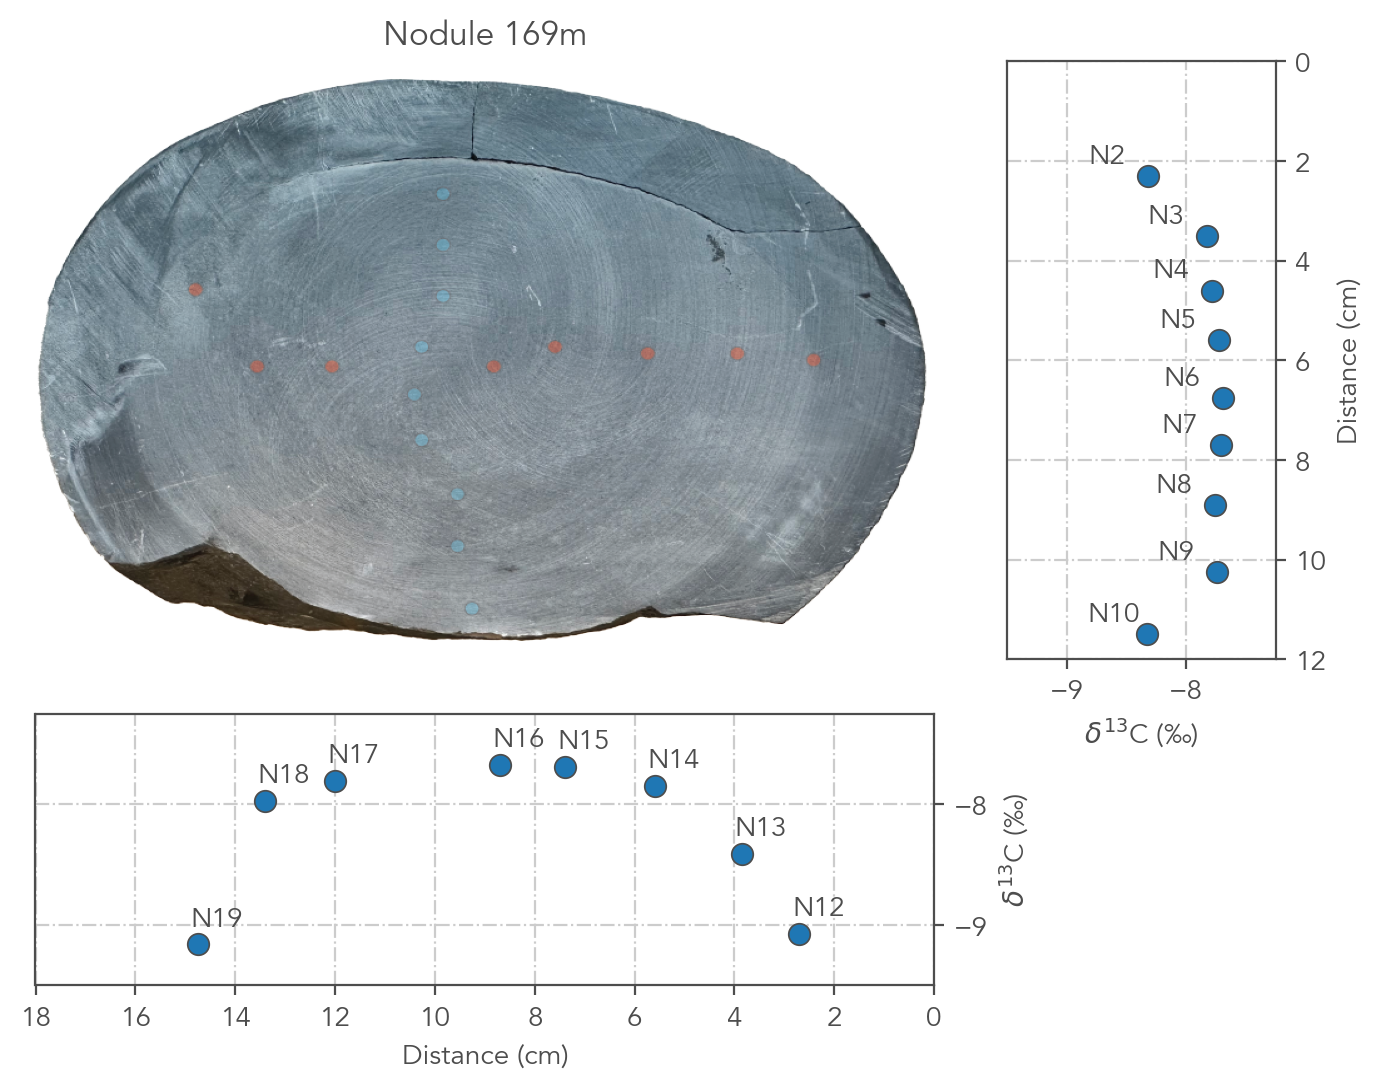

In [8]:
fig,ax = plt.subplot_mosaic("""
                            AAB
                            AAB
                            CC.
                            """,figsize=(8,6),gridspec_kw=dict(width_ratios=[1,1,0.65]))
axs = list(ax.keys())
ax['A'].imshow(im_169a,aspect='auto',zorder=2,extent=[0,17.6,0,12])
ws = ['longax_dist_from_right_cm','shortax_dist_from_top_cm']
sns.scatterplot(x=n169['longax_dist_from_right_cm'],y=n169['d13c_carb'],ax=ax['C'],s=60,edgecolor='.3')
sns.scatterplot(y=n169['shortax_dist_from_top_cm'],x=n169['d13c_carb'],ax=ax['B'],s=60,edgecolor='.3')
ax['A'].axis('off')
ax['B'].yaxis.tick_right()
ax['B'].yaxis.set_label_position('right')
ax['C'].yaxis.set_label_position('right')
ax['C'].yaxis.tick_right()
ax['B'].grid()
ax['C'].grid()
#ax['A'].grid(zorder=0)
ax['C'].invert_xaxis()
ax['C'].set_xlim(18,0)
ax['B'].set_ylim(0,12)
ax['B'].invert_yaxis()
ax['B'].set_ylabel('Distance (cm)')
ax['C'].set_xlabel('Distance (cm)')
ax['C'].set_ylabel('$\delta^{13}$C (‰)')
ax['B'].set_xlabel('$\delta^{13}$C (‰)')
ax['A'].set_title('Nodule 169m')
ax['C'].set_ylim(-9.5,-7.25)
ax['B'].set_xlim(-9.5,-7.25)

# label sample names long axis
x=n169['longax_dist_from_right_cm'][::-1].dropna().values
y=n169['d13c_carb'][::-1].dropna().values
l = n169['sample_name'][::-1]

for i,j,k in zip(x,y,l):
    y_off = 0.15
    x_off = 0.15
    ax['C'].text(i+x_off,j+y_off,'N'+k[-2:]);

# label sample names short axis
y=n169['shortax_dist_from_top_cm'].dropna().values
x=n169['d13c_carb'].dropna().values
l = n169['sample_name']

for i,j,k in zip(x,y,l):
    y_off = -0.25
    x_off = -0.5
    if k!='C1_169.0_N10':
        ax['B'].text(i+x_off,j+y_off,k[-2:])
    else:
        ax['B'].text(i+x_off,j+y_off,'N'+k[-2:])


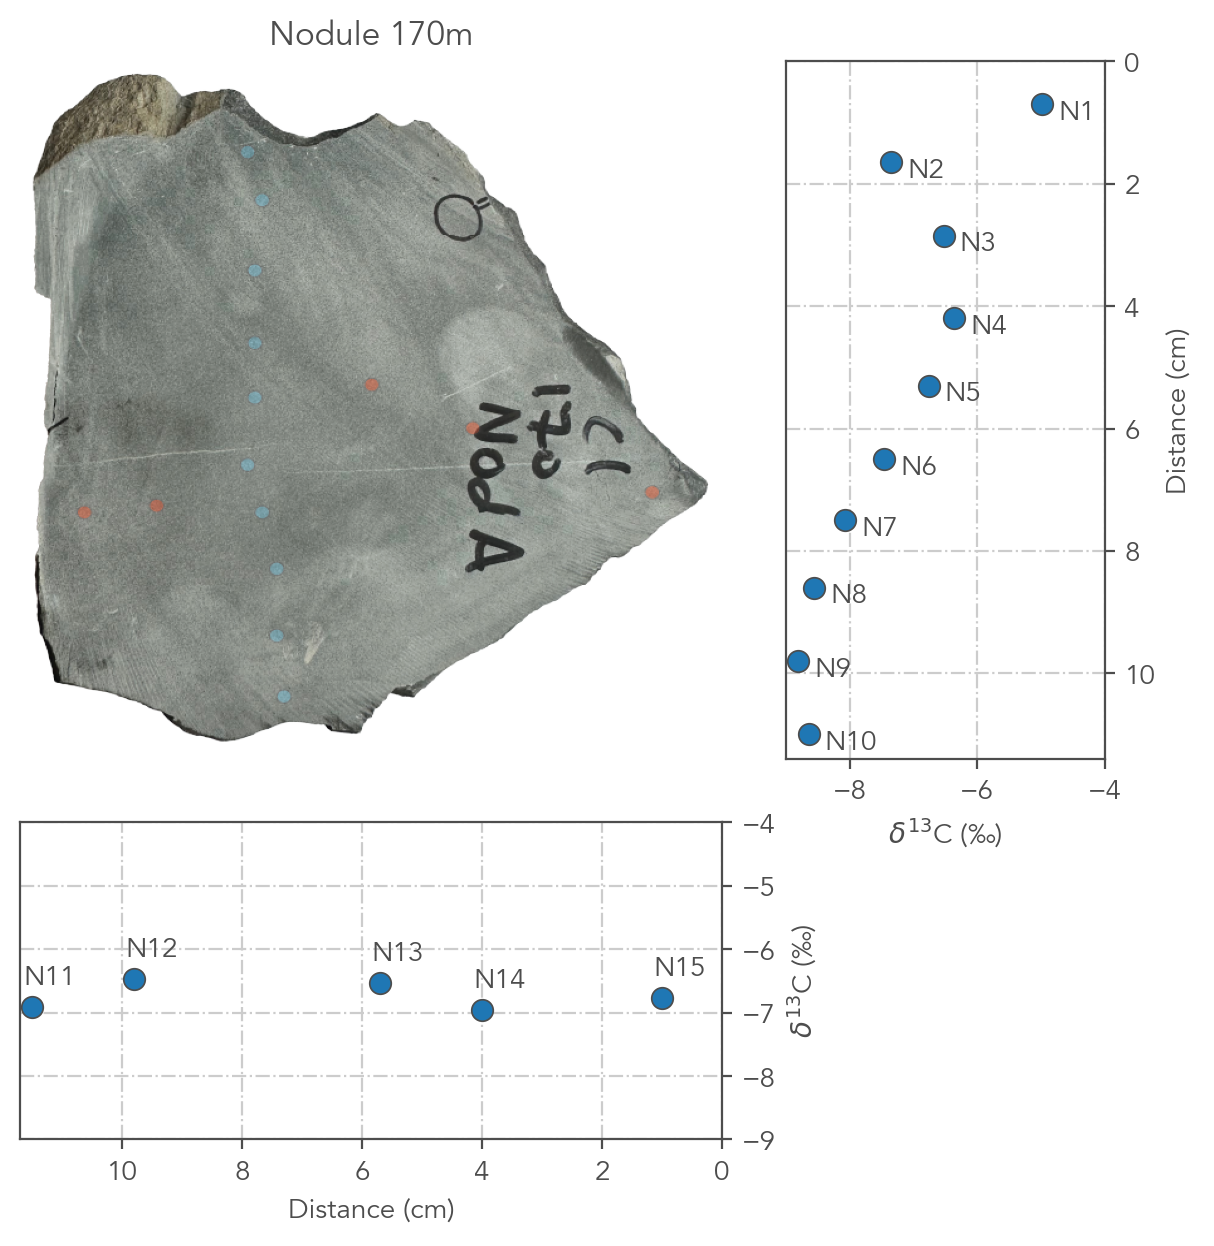

In [9]:
fig,ax = plt.subplot_mosaic("""
                            AAB
                            AAB
                            CC.
                            """,figsize=(7,7))
axs = list(ax.keys())
ax['A'].imshow(im_170a,aspect='auto',zorder=2,extent=[0,11.7,0,11.4])
ws = ['longax_dist_from_right_cm','shortax_dist_from_top_cm']
sns.scatterplot(x=n170['longax_dist_from_right_cm'],y=n170['d13c_carb'],ax=ax['C'],s=60,edgecolor='.3',clip_on=False)
sns.scatterplot(y=n170['shortax_dist_from_top_cm'],x=n170['d13c_carb'],ax=ax['B'],s=60,edgecolor='.3',clip_on=False)
ax['A'].axis('off')
ax['B'].yaxis.tick_right()
ax['B'].yaxis.set_label_position('right')
ax['C'].yaxis.set_label_position('right')
ax['C'].yaxis.tick_right()
ax['B'].grid()
ax['C'].grid()
#ax['A'].grid(zorder=0)
ax['C'].invert_xaxis()
ax['C'].set_xlim(11.7,0)
ax['B'].set_ylim(0,11.4)
ax['B'].invert_yaxis()
ax['B'].set_ylabel('Distance (cm)')
ax['C'].set_xlabel('Distance (cm)')
ax['C'].set_ylabel('$\delta^{13}$C (‰)')
ax['B'].set_xlabel('$\delta^{13}$C (‰)')
ax['A'].set_title('Nodule 170m')
ax['C'].set_ylim(-9,-4)
ax['B'].set_xlim(-9,-4)

# label sample names long axis
x=n170['longax_dist_from_right_cm'][::-1].dropna().values
y=n170['d13c_carb'][::-1].dropna().values
l = n170['sample_name'][::-1]

for i,j,k in zip(x,y,l):
    y_off = 0.35
    x_off = 0.15
    ax['C'].text(i+x_off,j+y_off,'N'+k[-2:]);

# label sample names short axis
y=n170['shortax_dist_from_top_cm'].dropna().values
x=n170['d13c_carb'].dropna().values
l = n170['sample_name']

for i,j,k in zip(x,y,l):
    y_off = 0.25
    x_off = 0.25
    if k!='C1_170.0_N10':
        ax['B'].text(i+x_off,j+y_off,k[-2:])
    else:
        ax['B'].text(i+x_off,j+y_off,'N'+k[-2:])


In [10]:
#fig,ax = plt.subplots(1,1,figsize=(6,5.5))
#ax.imshow(im_169a,zorder=0,extent=[0,17.6,0,12])
#ax.grid(zorder=1,color='.4')

lon_x = [15.22,13.725,12,10.18,8.975,5.8,4.35,3.1]
lon_y = [6,6.128,6.128,6.28,5.85,5.85,5.85,7.425]
shor_x = [8.55,8.275,8.275,7.56,7.425,7.55,7.98,7.98,7.98][::-1] # reversed so reading top to bottom like in notes and datasheet (same for y below)
shor_y = [1,2.25,3.3,4.4,5.3,6.25,7.25,8.32,9.33][::-1]

tot_x = np.array(shor_x+lon_x)
tot_y = np.array(shor_y+lon_y)

#plt.scatter(x=tot_x,y=tot_y,s=100,facecolor='none',edgecolor='.3')

n_169 = n169.copy()
n_169['x'] = tot_x
n_169['y'] = tot_y

- checked with excel sheet; data, locations and geochemistry are good! (for both nodules)

(0.0, 17.6, 0.0, 12.0)

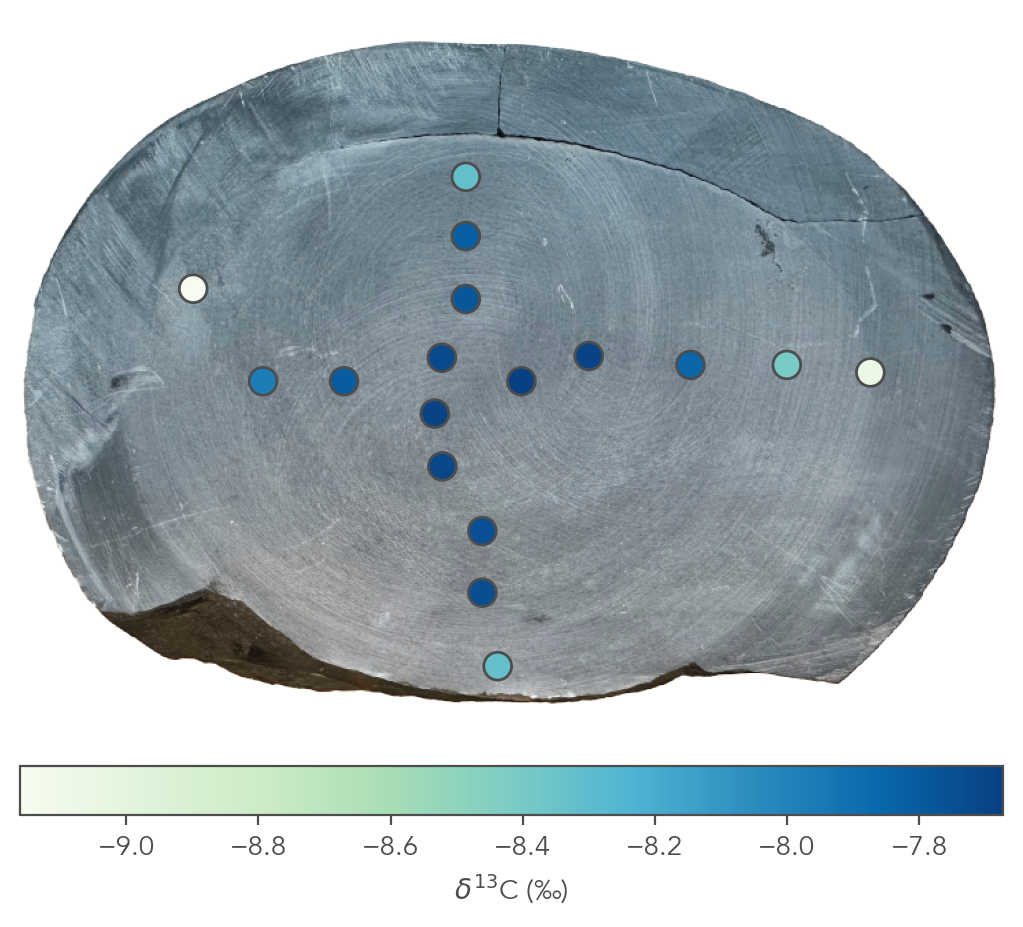

In [11]:
fig,ax = plt.subplots(1,1,figsize=(5,4.5),layout='constrained')
ax.imshow(im_169a,zorder=0,extent=[0,17.6,0,12],aspect='auto')
#ax.grid(zorder=1,color='.4')
a = ax.scatter(x=n_169['x'],y=n_169['y'],c=n_169['d13c_carb'],s=100,edgecolor='.3',cmap='GnBu')#,vmin=min(n_169['d13c_carb']),vmax=max(n_169['d13c_carb']))
plt.colorbar(a,label='$\delta^{13}$C (‰)',orientation='horizontal')
ax.axis('off')

# label samples
# x=n_169['x']
# y=n_169['y']
# l = n_169['d13c_carb']
# m = n_169['sample_name']

# for i,j,k,l in zip(x,y,l,m):
#     y_off = 0.25
#     x_off = 0.35  
#     #ax.text(i+x_off,j+y_off,round(k,2),color='.8')
#     #ax.text(i+x_off,j+y_off,'N'+l[-2:],color='.3')

In [12]:
# fig,ax = plt.subplots(1,1,figsize=(5.5,6))
# ax.imshow(im_170a,zorder=0,extent=[0,11.7,0,11.4],aspect='auto')
# ax.grid(zorder=1,color='.4')

# all reversed as need to get from top and from right (opposite currently)
lon_xa = [10.52,7.55,5.85,2.275,1.075][::-1]
lon_ya = [4.345,5.42,6.1,4.125,4.025][::-1]
shor_xa = [4.4,4.275,4.28,4.03,3.79,3.9,3.875,3.9,4.025,3.78][::-1]
shor_ya = [1.025,2,3.1,4.025,4.8,5.9,6.8,7.95,9.13,9.9][::-1]

tot_xa = np.array(shor_xa+lon_xa)
tot_ya = np.array(shor_ya+lon_ya)

#plt.scatter(x=tot_xa,y=tot_ya,s=100,facecolor='none',edgecolor='.3')

n_170 = n170.copy()
n_170['x'] = tot_xa
n_170['y'] = tot_ya

(0.0, 11.7, 0.0, 11.4)

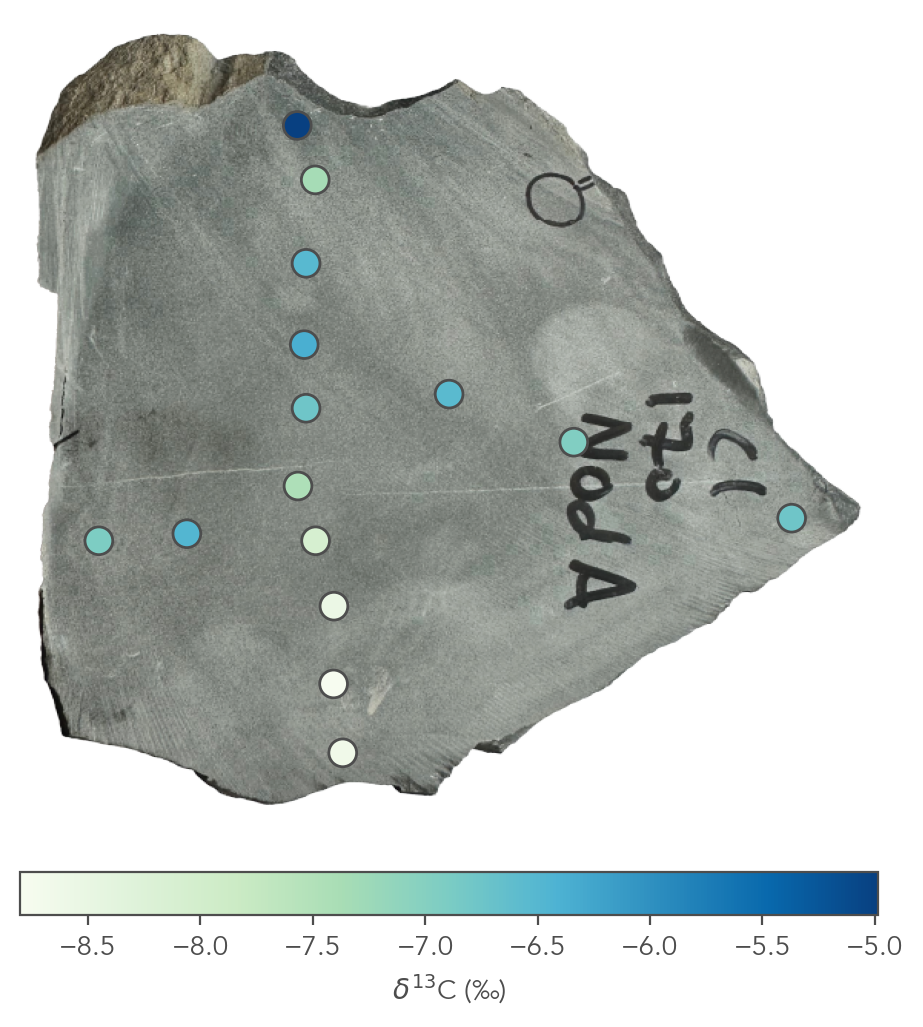

In [13]:
fig,ax = plt.subplots(1,1,figsize=(4.5,5),layout='constrained')
ax.imshow(im_170a,zorder=0,extent=[0,11.7,0,11.4],aspect='auto')
#ax.grid(zorder=1,color='.4')
a = ax.scatter(x=n_170['x'],y=n_170['y'],c=n_170['d13c_carb'],s=100,edgecolor='.3',cmap='GnBu')#,vmin=min(n_170['d13c_carb']),vmax=max(n_170['d13c_carb']))
plt.colorbar(a,label='$\delta^{13}$C (‰)',orientation='horizontal')
ax.axis('off')

# # label samples
# x=n_170['x']
# y=n_170['y']
# l = n_170['d13c_carb']
# m = n_170['sample_name']

# for i,j,k,l in zip(x,y,l,m):
#     y_off = 0.25
#     x_off = 0.35  
#     ax.text(i+x_off,j-y_off,round(k,2),color='red')
#     ax.text(i+x_off,j+y_off,'N'+l[-2:],color='orange')

## Compilation figure for nodules

In [14]:
# nrows, ncols = 2, 2
# dx, dy = 2, 1
# figsize = plt.figaspect(float(dy * nrows) / float(dx * ncols))

# fig,ax = plt.subplot_mosaic(
# """
# CA
# CB

# """,gridspec_kw=dict(),figsize=figsize)# (width_ratios=[1,0.8],height_ratios=[1,0.8]

# # nodule 169m
# ax['A'].imshow(im_169a,zorder=0,extent=[0,17.6,0,12],aspect='equal')
# #ax.grid(zorder=1,color='.4')
# a = ax['A'].scatter(x=n_169['x'],y=n_169['y'],c=n_169['d13c_carb'],s=100,edgecolor='.3',cmap='GnBu')#,vmin=min(n_169['d13c_carb']),vmax=max(n_169['d13c_carb']))
# #plt.colorbar(a,label='$\delta^{13}$C (‰)',orientation='vertical')
# ax['A'].axis('off')
# #ax['A'].set(adjustable='datalim')


# # nodule 170m
# ax['B'].imshow(im_170a,zorder=0,extent=[0,11.7,0,11.4],aspect='equal')
# #ax.grid(zorder=1,color='.4')
# a = ax['B'].scatter(x=n_170['x'],y=n_170['y'],c=n_170['d13c_carb'],s=100,edgecolor='.3',cmap='GnBu')#,vmin=min(n_170['d13c_carb']),vmax=max(n_170['d13c_carb']))
# #plt.colorbar(a,label='$\delta^{13}$C (‰)',orientation='vertical')
# ax['B'].axis('off')
# #ax['B'].set(adjustable='datalim')


# # crossplot
# sns.scatterplot(x=nods['d18o_carb'],y=nods['d13c_carb'],hue=nods['sample_height'],ax=ax['C'],palette=cmap,s=90,edgecolor='.3',zorder=10,legend=False)
# ax['C'].grid()
# # plot confidence ellipses
# for i,j in zip([n169,n170],[map[0],map[-1]]):
#     confidence_ellipse(x=i['d18o_carb'],y=i['d13c_carb'],ax=ax['C'],n_std=1,alpha=.2,lw=0.5,zorder=2,facecolor=j,label='1$\sigma$')
#     confidence_ellipse(x=i['d18o_carb'],y=i['d13c_carb'],ax=ax['C'],n_std=2,alpha=.1,lw=0.5,zorder=2,facecolor=j,label='1$\sigma$')

# #fig.colorbar(a,label='$\delta^{13}$C (‰)',orientation='vertical')
# plt.subplots_adjust(wspace=0)


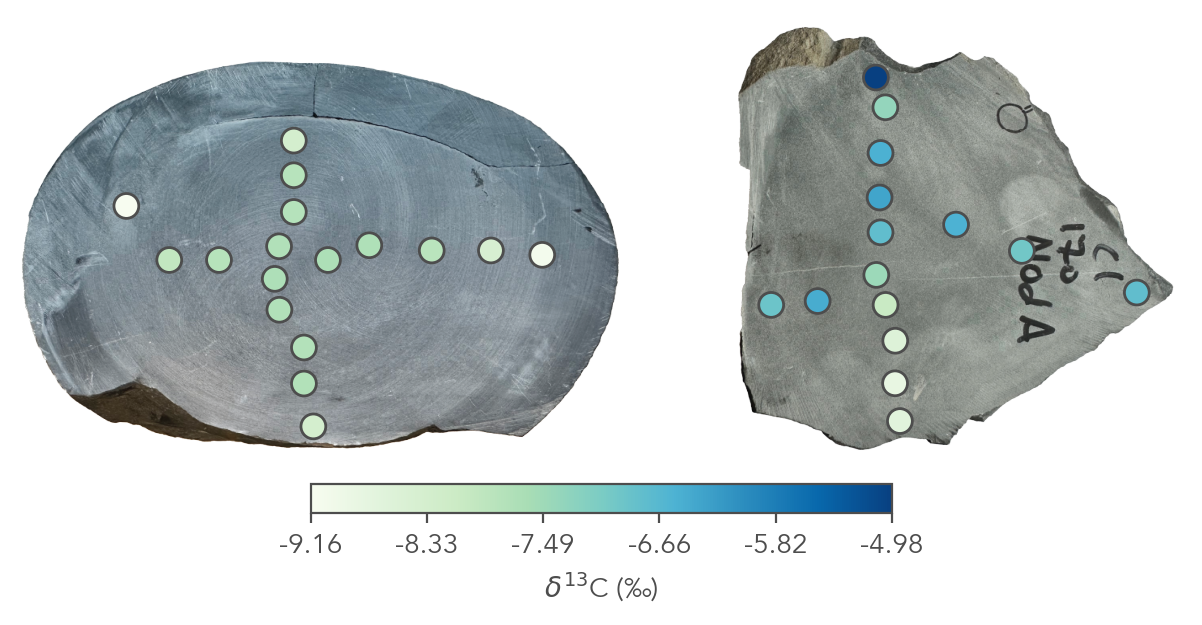

In [15]:
fig,ax = plt.subplots(1,2,gridspec_kw=dict(width_ratios=[1,0.75]),figsize=(7.5,6))

cmap = 'GnBu'
cmin = min(nods['d13c_carb'])
cmax = max(nods['d13c_carb'])

ex_169 = [0,17.6,0,12]
ex_170 = [0,11.7,0,11.4]

for idx,(img,ext) in enumerate(zip([im_169a,im_170a],[ex_169,ex_170])):
    ax[idx].imshow(img,zorder=0,extent=ext,aspect='1')

for idx,nod in enumerate([n_169,n_170]):
    a = ax[idx].scatter(x=nod['x'],y=nod['y'],c=nod['d13c_carb'],s=80,edgecolor='.3',cmap=cmap,vmin=cmin,vmax=cmax)
    ax[idx].axis('off')

fmt = lambda x, pos: '{:.2f}'.format(x)
fig.colorbar(a,ax=ax.ravel(),label='$\delta^{13}$C (‰)',orientation='horizontal',shrink = 0.5,pad = 0.025,location= 'bottom',
            ticks = np.linspace(cmin,cmax,6),format=FuncFormatter(fmt))


In [16]:
nods_a = nods.copy()
r = {169:'169m',170:'170m'}
nods_a['sample_height'] = nods_a['sample_height'].replace(r)

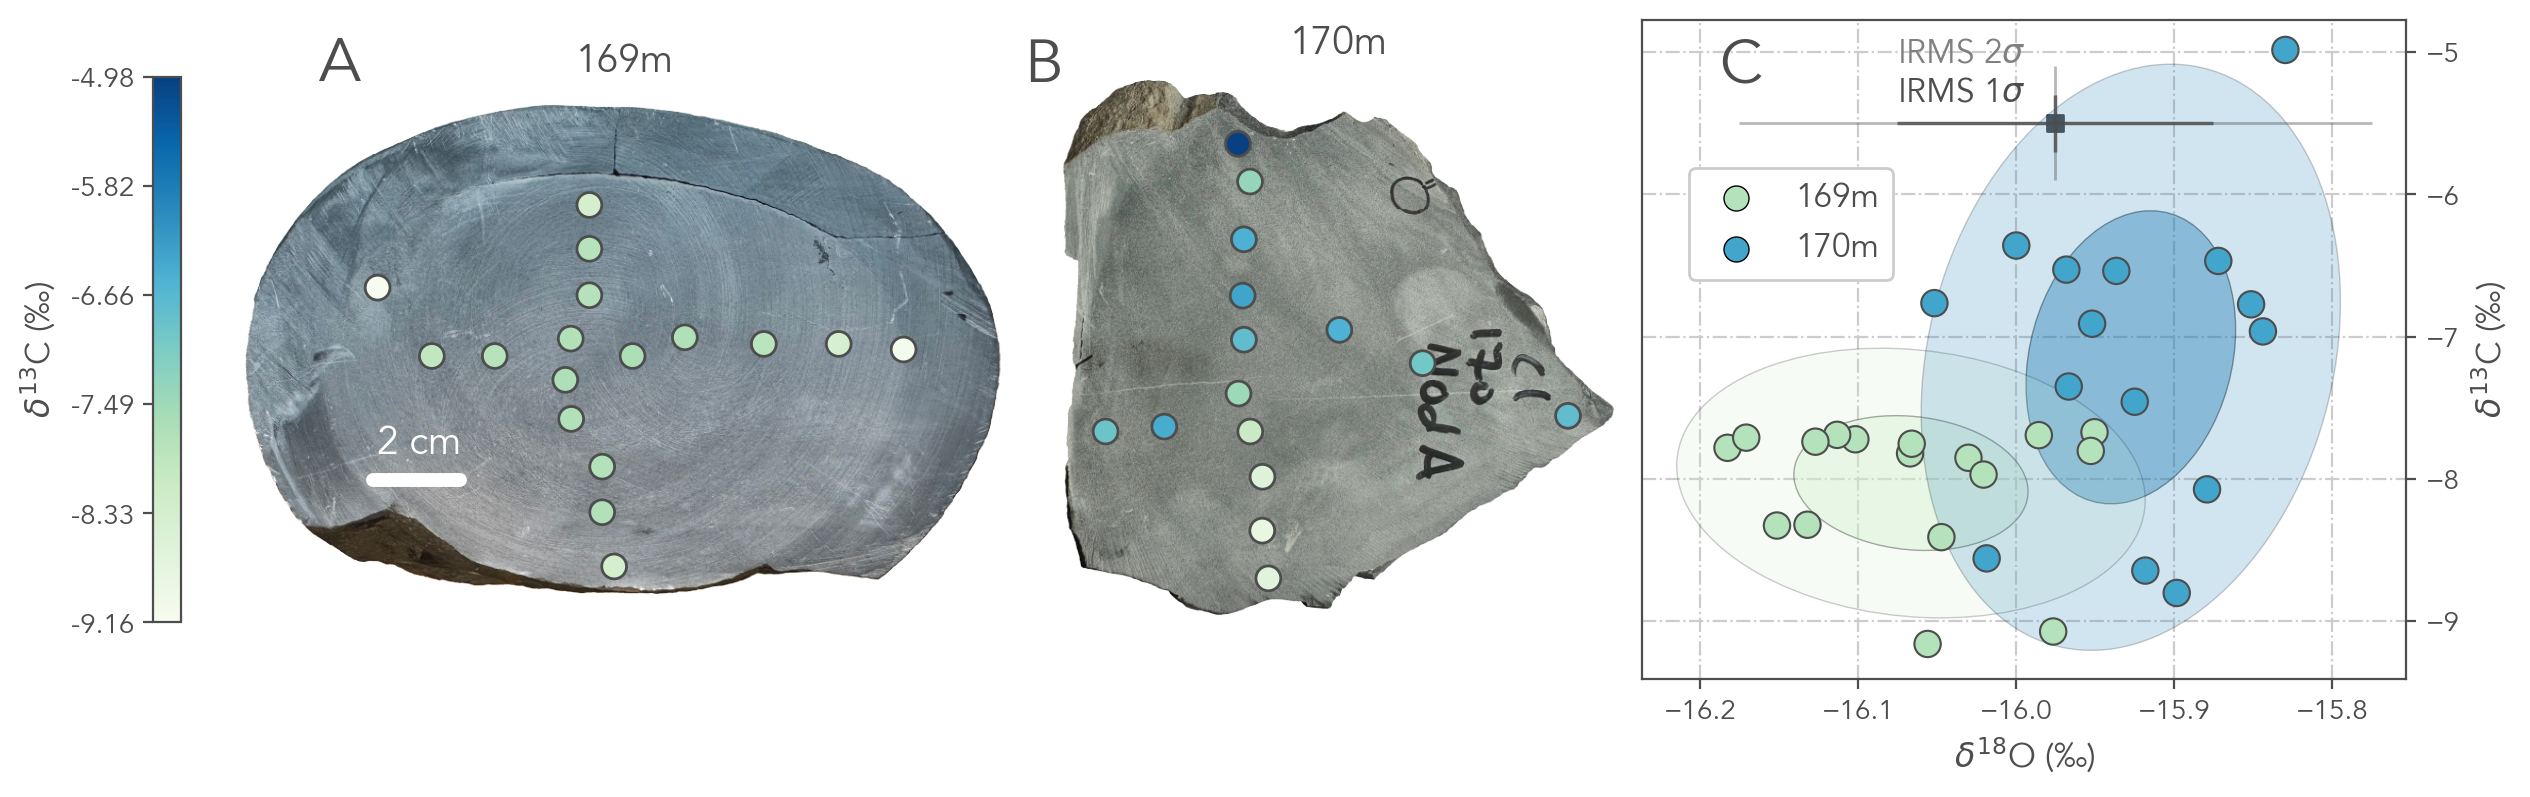

In [17]:
%matplotlib inline
fig,ax = plt.subplots(1,3,gridspec_kw=dict(width_ratios=[1,0.75,1]),figsize=(12.5,11),layout='constrained')

cmap = 'GnBu'
cmin = min(nods_a['d13c_carb'])
cmax = max(nods_a['d13c_carb'])

ex_169 = [0,17.6,0,12]
ex_170 = [0,11.7,0,11.4]

# axi = ax[0].inset_axes(bounds=[0.65,-.15,.4,.4])
# axi.imshow(im_169_out,zorder=0,extent=ex_169,aspect='equal')
# #axi.axis('off')
# axi.set_yticks([])
# axi.set_xticks([])

# hand = [Patch(facecolor='#f6e8c3', edgecolor='.3',label='siltstone'),
#         Patch(facecolor='#c7eae5', edgecolor='.3',label='limestone')]

# axi.legend(loc=3,handles=hand,handlelength=0.75)

for idx,(img,ext) in enumerate(zip([im_169a,im_170a],[ex_169,ex_170])):
    ax[idx].imshow(img,zorder=0,extent=ext,aspect='equal')

for idx,nod in enumerate([n_169,n_170]):
    a = ax[idx].scatter(x=nod['x'],y=nod['y'],c=nod['d13c_carb'],s=80,edgecolor='.3',cmap=cmap,vmin=cmin,vmax=cmax)
    ax[idx].axis('off')

fmt = lambda x, pos: '{:.2f}'.format(x)
cbar = fig.colorbar(a,ax=ax[:3].ravel(),orientation='vertical',shrink = 0.25,pad = 0.025,location= 'left',
            ticks = np.linspace(cmin,cmax,6),format=FuncFormatter(fmt))
cbar.set_label(label='$\delta^{13}$C (‰)',size=12)
cbar.ax.tick_params(labelsize=10) 

# add crossplot
sns.scatterplot(x=nods_a['d18o_carb'],y=nods_a['d13c_carb'],hue=nods_a['sample_height'],ax=ax[2],palette=cmap,s=90,edgecolor='.3',zorder=10,legend=True)

# plot confidence ellipses
map = sns.color_palette(cmap,n_colors=4).as_hex()

for i,j in zip([n169,n170],[map[0],map[-1]]):
    confidence_ellipse(x=i['d18o_carb'],y=i['d13c_carb'],ax=ax[2],n_std=1,alpha=.4,lw=0.5,zorder=1,facecolor=j)#,label='1$\sigma$')
    confidence_ellipse(x=i['d18o_carb'],y=i['d13c_carb'],ax=ax[2],n_std=2,alpha=.2,lw=0.5,zorder=2,facecolor=j)#,label='2$\sigma$')
    
ax[2].set_aspect(0.09)
ax[2].yaxis.tick_right()
ax[2].yaxis.set_label_position('right')
ax[2].grid()
ax[2].set_xlabel('$\delta^{18}$O (‰)',fontsize=12)
ax[2].set_ylabel('$\delta^{13}$C (‰)',fontsize=12)
# plt.subplots_adjust(wspace=0)
handles, labels = ax[2].get_legend_handles_labels()
for ha in handles:
    ha.set_edgecolor('k')
    ha.set_linewidth(0.5)
ax[2].legend(bbox_to_anchor=(0.35,0.8),framealpha=1,fontsize=12,markerscale=1.5)#,title='Nodule Height')

# add 1sigma for Sercon
ax[2].errorbar([-15.975],[-5.5],xerr=0.2,yerr=0.4,lw=1,c='.3',capsize=0,alpha=0.4)
ax[2].errorbar([-15.975],[-5.5],xerr=0.1,yerr=0.2,lw=1.25,c='.3',capsize=0,alpha=0.8)

ax[2].scatter([-15.975],[-5.5],lw=1,c='.3',marker='s')
ax[2].text(-16.075,-5.075,'IRMS 2$\sigma$',fontsize=12,color='.5')
ax[2].text(-16.075,-5.35,'IRMS 1$\sigma$',fontsize=12)

# add scale
ax[0].plot([3,5 ],[3,3],lw=5,c='w')
#ax[1].plot([1,3],[2,2],lw=5,c='w')
ax[0].text(3.075,3.6,'2 cm',fontsize=14,color='w')
#ax[1].text(1.075,2.6,'2 cm',fontsize=14,color='w')

# labels - can't be slick and loop it as lots of funky axis sizes in this figure
ax[0].text(0.1,1.015,'A',transform=ax[0].transAxes,fontsize=22)
ax[1].text(-0.05,0.98,'B',transform=ax[1].transAxes,fontsize=22)
ax[2].text(0.1,0.905,'C',transform=ax[2].transAxes,fontsize=22)

ax[0].set_title('169m',fontsize=14)
ax[1].set_title('170m',fontsize=14)

fig.savefig(fig_dir+'auth_nods.pdf',format='pdf',bbox_inches='tight',transparent=True)

#### Figure Rationale:
- 

In [18]:
m = sns.color_palette('BrBG',n_colors=4)
print(m.as_hex())
m

['#bf812d', '#f6e8c3', '#c7eae5', '#35978f']


[(0.7490196078431373, 0.5058823529411764, 0.17647058823529413),
 (0.9647058823529412, 0.9098039215686274, 0.7647058823529411),
 (0.7803921568627453, 0.9176470588235294, 0.8980392156862746),
 (0.207843137254902, 0.592156862745098, 0.5607843137254902)]